# Crab Age Regression Kaggle Playground Series

In [20]:
import kaggle
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Call the dataset into your local machine : the simple way
# od.download(
#     "https://www.kaggle.com/competitions/playground-series-s3e16/data")

In [13]:
import pandas as pd
train = pd.read_csv(r'D:/Data Science Project/Personal Project/Regression-with-a-Crab-Age-Kaggle/playground-series-s3e16/train.csv')
test = pd.read_csv(r'D:/Data Science Project/Personal Project/Regression-with-a-Crab-Age-Kaggle/playground-series-s3e16/test.csv')
sample = pd.read_csv(r'D:/Data Science Project/Personal Project/Regression-with-a-Crab-Age-Kaggle/playground-series-s3e16/sample_submission.csv')

In [87]:
train_short = train[:5000]
train = train_short.copy()

In [82]:
train_short = train[:5000, :]

InvalidIndexError: (slice(None, 5000, None), slice(None, None, None))

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   Sex             5000 non-null   object 
 2   Length          5000 non-null   float64
 3   Diameter        5000 non-null   float64
 4   Height          5000 non-null   float64
 5   Weight          5000 non-null   float64
 6   Shucked Weight  5000 non-null   float64
 7   Viscera Weight  5000 non-null   float64
 8   Shell Weight    5000 non-null   float64
 9   Age             5000 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 390.8+ KB


### Data Observation

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [17]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [18]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


- We have seen that the data was clean from missing values or invalid data types
- We can move into the next steps 

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


**Create Numerical Data Distribution Between Data**

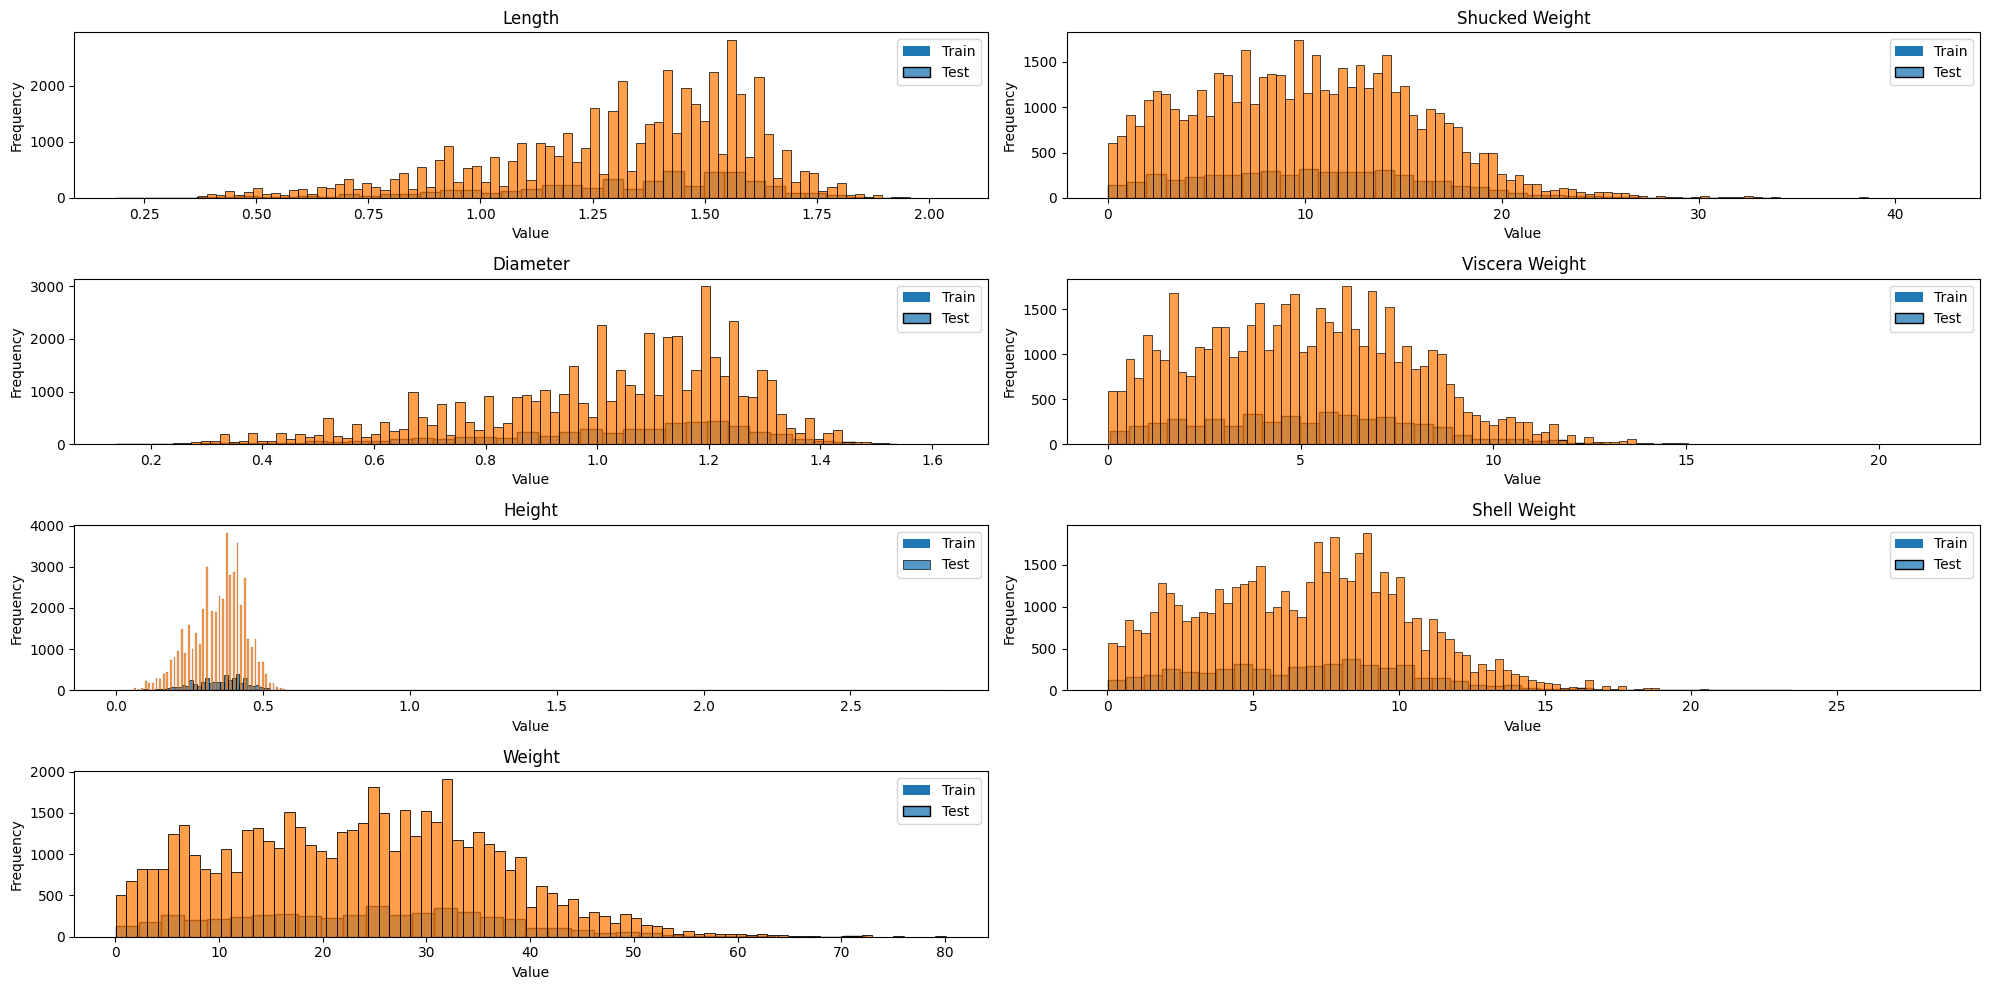

In [165]:
fig, axs = plt.subplots(4, 2, figsize = (20, 10))

def plot_hist(col, x, y):
    axs[x, y].set_title(col)  # Set the title for the subplot
    sns.histplot(train[col], ax=axs[x, y])
    axs[x, y].set_xlabel('Value')
    axs[x, y].set_ylabel('Frequency')
    sns.histplot(test[col], ax=axs[x, y])
    axs[x, y].legend(['Train', 'Test'])  # Set the legend labels

plot_hist('Length', 0, 0)
plot_hist('Diameter', 1, 0)
plot_hist('Height', 2, 0)
plot_hist('Weight', 3, 0)
plot_hist('Shucked Weight', 0, 1)
plot_hist('Viscera Weight', 1, 1)
plot_hist('Shell Weight', 2, 1)

# Remove the subplot at position [3, 1]
axs[3, 1].remove()

plt.tight_layout()
plt.show()

**Analyze Correlation**

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Select the correlation values of the 'x' column with all other columns
x_correlations = corr_matrix['x']

# Create a subset dataframe with only the correlations of 'x' with other features
correlation_subset = corr_matrix.loc[['x'], :]

C:\Users\user\AppData\Local\Temp\ipykernel_8952\1079283874.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


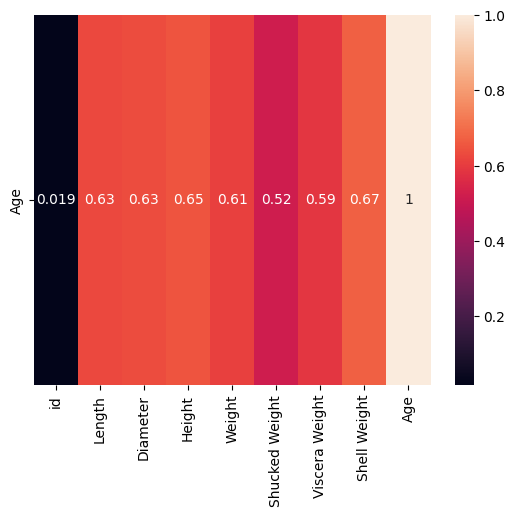

In [173]:
ax, fig = plt.subplots()

corr_matrix = train.corr()
x_correlations = corr_matrix['Age']
correlation_subset = corr_matrix.loc[['Age'], :]

sns.heatmap(correlation_subset, annot = True)

plt.show()

### Data Cleaning

The Data Was Clean, i think there is no necessary improvement that we could afford for now 

### Data Preprocessing

### Model Training

### Model Evaluation

### Submit Models 